# Kütüphanelerin import edilmesi 

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from pandas.plotting import parallel_coordinates
import seaborn as sns

# Fonksiyonların tanımlanması 

In [3]:
def mevsim(tarih):
    if tarih in np.arange("2019-01-01","2019-03-21", dtype='datetime64[D]'):
        return "kış"
    elif tarih in np.arange("2019-03-21","2019-06-22", dtype='datetime64[D]'):
        return "ilkbahar"
    elif tarih in np.arange("2019-06-22","2019-09-23", dtype='datetime64[D]'):
        return "yaz"
    elif tarih in np.arange("2019-09-23","2019-12-22", dtype='datetime64[D]'):
        return "sonbahar"
    elif tarih in np.arange("2019-12-22","2020-01-01", dtype='datetime64[D]'):
        return "kış"
    
    elif tarih in np.arange("2020-01-01","2020-03-21", dtype='datetime64[D]'):
        return "kış"
    elif tarih in np.arange("2020-03-21","2020-06-22", dtype='datetime64[D]'):
        return "ilkbahar"
    elif tarih in np.arange("2020-06-22","2020-09-23", dtype='datetime64[D]'):
        return "yaz"
    elif tarih in np.arange("2020-09-23","2020-12-22", dtype='datetime64[D]'):
        return "sonbahar"
    elif tarih in np.arange("2020-12-22","2021-01-01", dtype='datetime64[D]'):
        return "kış"
    
    elif tarih in np.arange("2021-01-01","2021-03-21", dtype='datetime64[D]'):
        return "kış"
    elif tarih in np.arange("2021-03-21","2021-06-22", dtype='datetime64[D]'):
        return "ilkbahar"
    elif tarih in np.arange("2021-06-22","2021-09-23", dtype='datetime64[D]'):
        return "yaz"
    elif tarih in np.arange("2021-09-23","2021-12-22", dtype='datetime64[D]'):
        return "sonbahar"
    elif tarih in np.arange("2021-12-22","2022-01-01", dtype='datetime64[D]'):
        return "kış"   
    
    elif tarih in np.arange("2022-01-01","2022-03-21", dtype='datetime64[D]'):
        return "kış"
    elif tarih in np.arange("2022-03-21","2022-06-22", dtype='datetime64[D]'):
        return "ilkbahar"
    elif tarih in np.arange("2022-06-22","2022-09-23", dtype='datetime64[D]'):
        return "yaz"
    elif tarih in np.arange("2022-09-23","2022-12-22", dtype='datetime64[D]'):
        return "sonbahar"
    elif tarih in np.arange("2022-12-22","2023-01-01", dtype='datetime64[D]'):
        return "kış"
    
def encode_units(x):
    if x<=0:
        return 0
    elif x>=1:
        return 1
    
def pp(x):
    if x in q.index:
        return True
    else:
        return False
    
def sp(x):
    a= x.split("-")
    return a[len(a)-1]

# Function to convert rules to coordinates.
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['confience'] = rules['confidence']
    return rules[['antecedent','consequent','confidence']]

def rules_to_coordinates2(rules,metric):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules[metric] = rules[metric]
    return rules[['antecedent','consequent',metric]]

In [4]:
df=pd.read_csv(r"df_birliktelik.csv")

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)

# Veri Ön İşleme ve Ön Bakış

In [6]:
#df=df.rename(columns={"YilAyGun":"tarih"})

df["tarih"] = pd.to_datetime(df["tarih"], format='%Y-%m-%d')

In [7]:
df["yıl"]=df.tarih.dt.year
df["ay"]=df.tarih.dt.month
df["gün"]=df.tarih.dt.day
df["haftanin_günleri"]=df.tarih.dt.day_of_week
df["renk"]=df.OptionTanim.apply(sp)

df['mevsim']=df['tarih'].apply(mevsim)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122720 entries, 0 to 2122719
Data columns (total 16 columns):
 #   Column                Dtype         
---  ------                -----         
 0   tarih                 datetime64[ns]
 1   FisNo                 int64         
 2   MerchMarkaYasGrupKod  object        
 3   UrunKlasmanRef        int64         
 4   UrunKlasmanTanim      object        
 5   KlasmanGrupRef        int64         
 6   KlasmanGrupTanim      object        
 7   UrunOptionRef         int64         
 8   OptionTanim           object        
 9   Miktar                int64         
 10  yıl                   int64         
 11  ay                    int64         
 12  gün                   int64         
 13  haftanin_günleri      int64         
 14  renk                  object        
 15  mevsim                object        
dtypes: datetime64[ns](1), int64(9), object(6)
memory usage: 259.1+ MB


In [24]:
df.shape

(2122720, 16)

In [9]:
#eksik değer analizi
df.isnull().sum()

tarih                   0
FisNo                   0
MerchMarkaYasGrupKod    0
UrunKlasmanRef          0
UrunKlasmanTanim        0
KlasmanGrupRef          0
KlasmanGrupTanim        0
UrunOptionRef           0
OptionTanim             0
Miktar                  0
yıl                     0
ay                      0
gün                     0
haftanin_günleri        0
renk                    0
mevsim                  0
dtype: int64

In [12]:
#miktar değişkeninin istatistiksel değerleri
df["Miktar"].describe().apply(lambda x: format(x, 'f'))

count    2122720.000000
mean           1.053711
std            0.419090
min            1.000000
25%            1.000000
50%            1.000000
75%            1.000000
max          187.000000
Name: Miktar, dtype: object

In [23]:
df["Miktar"].sort_values(ascending=False)

1054069    187
1704522    150
1471061    150
404405     100
710903     100
          ... 
722196       1
722195       1
722194       1
722193       1
2122719      1
Name: Miktar, Length: 2122720, dtype: int64

In [12]:
len(df.FisNo.unique())

698370

In [13]:
len(df.MerchMarkaYasGrupKod.unique())

71

In [14]:
len(df.UrunKlasmanRef.unique())

819

In [15]:
len(df.KlasmanGrupRef.unique())

175

In [16]:
len(df.UrunOptionRef.unique())

106388

## Veri oluşturma 

In [26]:
df_buyuk=df[(df["MerchMarkaYasGrupKod"].str.startswith("BU")) | (df["MerchMarkaYasGrupKod"].str.startswith("BG"))]
df_buyuk_erkek=df[df["MerchMarkaYasGrupKod"].str.startswith("BU")]
df_buyuk_kadın=df[df["MerchMarkaYasGrupKod"].str.startswith("BG")]

df_cocuk=df[(df["MerchMarkaYasGrupKod"].str.startswith("CK")) | ( df["MerchMarkaYasGrupKod"].str.startswith("CU"))]
df_kiz_cocuk=df[df["MerchMarkaYasGrupKod"].str.startswith("CK")]
df_erkek_cocuk=df[df["MerchMarkaYasGrupKod"].str.startswith("CU")]

df_diger=df[~((df["MerchMarkaYasGrupKod"].str.startswith("BU"))  |(df["MerchMarkaYasGrupKod"].str.startswith("BG")) | 
              (df["MerchMarkaYasGrupKod"].str.startswith("CK"))|  ( df["MerchMarkaYasGrupKod"].str.startswith("CU")))]

## Görselleştirme fonksiyonu

In [27]:
def gorsellestirme(df,column=None,mevsim="all",choice="all",fig_1=10,fig_2=12,range_=30,date=False,
                   date_start="2019-12-31",date_finish="2019-12-31"):
    if date==True:
        df_full=df[(df["tarih"]<=date_finish) &(df["tarih"]>=date_start)]
        df_full=df_full.groupby(column)["Miktar"].sum().reset_index().sort_values(by="Miktar",ascending=False)
        fig = plt.figure(figsize = (fig_1, fig_2))
        color = plt.cm.rainbow(np.linspace(0, 1, 40))
        plt.xticks(rotation = 90)
        plt.bar(df_full[0:range_][column],df_full[0:range_]["Miktar"],color=color)


    elif date==False:
        if mevsim=="all":
            if choice=="weekend":
                df_full=df[df["haftanin_günleri"]>=5]
                df_full=df_full.groupby(column)["Miktar"].sum().reset_index().sort_values(by="Miktar",ascending=False)
                fig = plt.figure(figsize = (fig_1, fig_2))
                color = plt.cm.rainbow(np.linspace(0, 1, 40))
                plt.xticks(rotation = 90)
                plt.bar(df_full[0:range_][column],df_full[0:range_]["Miktar"],color=color)


            elif choice=="weekday":
                df_full=df[df["haftanin_günleri"]<=4]

                df_full=df_full.groupby(column)["Miktar"].sum().reset_index().sort_values(by="Miktar",ascending=False)
                fig = plt.figure(figsize = (fig_1, fig_2))
                color = plt.cm.rainbow(np.linspace(0, 1, 40))
                plt.xticks(rotation = 90)
                plt.bar(df_full[0:range_][column],df_full[0:range_]["Miktar"],color=color)


            elif choice=="all":
                df_full=df.groupby(column)["Miktar"].sum().reset_index().sort_values(by="Miktar",ascending=False)
                fig = plt.figure(figsize = (fig_1, fig_2))
                color = plt.cm.rainbow(np.linspace(0, 1, 40))
                plt.xticks(rotation = 90)
                plt.bar(df_full[0:range_][column],df_full[0:range_]["Miktar"],color=color)


        elif mevsim=="ilkbahar" or mevsim=="yaz" or mevsim=="sonbahar" or mevsim=="kış":
            df=df[df["mevsim"]==mevsim]
            if choice=="weekend":
                df_full=df[df["haftanin_günleri"]>=5]
                df_full=df_full.groupby(column)["Miktar"].sum().reset_index().sort_values(by="Miktar",ascending=False)
                fig = plt.figure(figsize = (fig_1, fig_2))
                color = plt.cm.rainbow(np.linspace(0, 1, 40))
                plt.xticks(rotation = 90)
                plt.bar(df_full[0:range_][column],df_full[0:range_]["Miktar"],color=color)


            elif choice=="weekday":
                df_full=df[df["haftanin_günleri"]<=4]
                df_full=df_full.groupby(column)["Miktar"].sum().reset_index().sort_values(by="Miktar",ascending=False)
                fig = plt.figure(figsize = (fig_1, fig_2))
                color = plt.cm.rainbow(np.linspace(0, 1, 40))
                plt.xticks(rotation = 90)
                plt.bar(df_full[0:range_][column],df_full[0:range_]["Miktar"],color=color)


            elif choice=="all":
                df_full=df.groupby(column)["Miktar"].sum().reset_index().sort_values(by="Miktar",ascending=False)
                fig = plt.figure(figsize = (fig_1, fig_2))
                color = plt.cm.rainbow(np.linspace(0, 1, 40))
                plt.xticks(rotation = 90)
                plt.bar(df_full[0:range_][column],df_full[0:range_]["Miktar"],color=color)


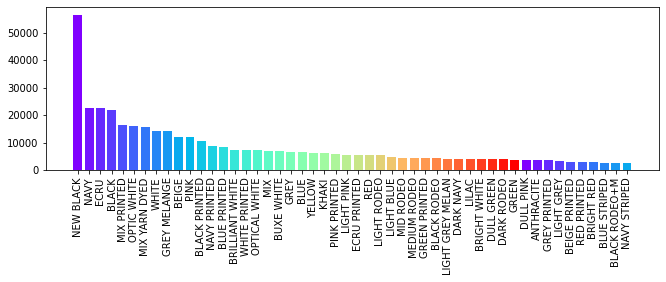

In [124]:
gorsellestirme(df,mevsim="yaz",column="renk",range_=50,fig_1=11,fig_2=3)

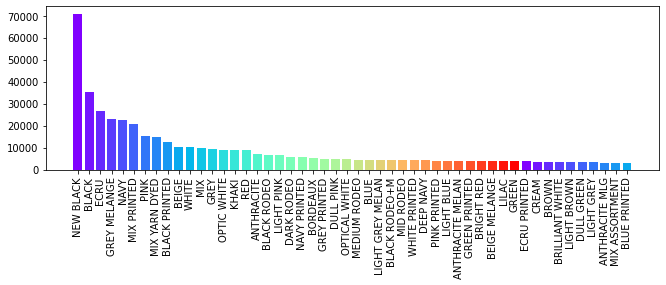

In [119]:
gorsellestirme(df,mevsim="kış",column="renk",range_=50,fig_1=11,fig_2=3)

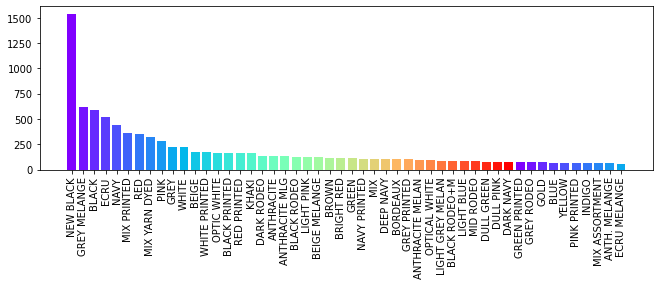

In [123]:
gorsellestirme(df,column="renk",range_=50,fig_1=11,fig_2=3,date=True,date_start="2020-11-20",date_finish="2020-11-27")

## Modelleme fonksiyonu 

In [23]:
def modelleme(df,column=None,mevsim="all",min_support=0.5,metric="confidence",min_threshold=0.8,max_len=None,choice="all",date=False,
              date_start="2019-12-31",date_finish="2019-12-31"): 
    if date==True:
        df_full=df[(df["tarih"]<=date_finish) &(df["tarih"]>=date_start)]
        df_full=df_full.groupby(["FisNo",column])["Miktar"].sum().unstack().fillna(0)
        df_encode=df_full.applymap(encode_units)
        df_items=apriori(df_encode,min_support=min_support,use_colnames=True,max_len=max_len)
        df_items["length"]=df_items["itemsets"].apply(lambda x:len(x))
        rule=association_rules(df_items,metric=metric,min_threshold=min_threshold)

        return rule.sort_values(metric,ascending=False).reset_index(drop=True)
    
    elif date==False:
        if mevsim=="all":
            if choice=="weekend":
                df_full=df[df["haftanin_günleri"]>=5]
                df_full=df_full.groupby(["FisNo",column])["Miktar"].sum().unstack().fillna(0)
                df_encode=df_full.applymap(encode_units)
                df_items=apriori(df_encode,min_support=min_support,use_colnames=True,max_len=max_len)
                df_items["length"]=df_items["itemsets"].apply(lambda x:len(x))
                rule=association_rules(df_items,metric=metric,min_threshold=min_threshold)

                return rule.sort_values(metric,ascending=False).reset_index(drop=True)

            elif choice=="weekday":
                df_full=df[df["haftanin_günleri"]<=4]
                df_full=df_full.groupby(["FisNo",column])["Miktar"].sum().unstack().fillna(0)
                df_encode=df_full.applymap(encode_units)
                df_items=apriori(df_encode,min_support=min_support,use_colnames=True,max_len=max_len)
                df_items["length"]=df_items["itemsets"].apply(lambda x:len(x))
                rule=association_rules(df_items,metric=metric,min_threshold=min_threshold)

                return rule.sort_values(metric,ascending=False).reset_index(drop=True)

            elif choice=="all":
                df_full=df.groupby(["FisNo",column])["Miktar"].sum().unstack().fillna(0)
                df_encode=df_full.applymap(encode_units)
                df_items=apriori(df_encode,min_support=min_support,use_colnames=True,max_len=max_len)
                df_items["length"]=df_items["itemsets"].apply(lambda x:len(x))
                rule=association_rules(df_items,metric=metric,min_threshold=min_threshold)

                return rule.sort_values(metric,ascending=False).reset_index(drop=True)

        elif mevsim=="ilkbahar" or mevsim=="yaz" or mevsim=="sonbahar" or mevsim=="kış":
            df=df[df["mevsim"]==mevsim]
            if choice=="weekend":
                df_full=df[df["haftanin_günleri"]>=5]
                df_full=df_full.groupby(["FisNo",column])["Miktar"].sum().unstack().fillna(0)
                df_encode=df_full.applymap(encode_units)
                df_items=apriori(df_encode,min_support=min_support,use_colnames=True,max_len=max_len)
                df_items["length"]=df_items["itemsets"].apply(lambda x:len(x))
                rule=association_rules(df_items,metric=metric,min_threshold=min_threshold)

                return rule.sort_values(metric,ascending=False).reset_index(drop=True)

            elif choice=="weekday":
                df_full=df[df["haftanin_günleri"]<=4]
                df_full=df_full.groupby(["FisNo",column])["Miktar"].sum().unstack().fillna(0)
                df_encode=df_full.applymap(encode_units)
                df_items=apriori(df_encode,min_support=min_support,use_colnames=True,max_len=max_len)
                df_items["length"]=df_items["itemsets"].apply(lambda x:len(x))
                rule=association_rules(df_items,metric=metric,min_threshold=min_threshold)

                return rule.sort_values(metric,ascending=False).reset_index(drop=True)

            elif choice=="all":
                df_full=df.groupby(["FisNo",column])["Miktar"].sum().unstack().fillna(0)
                df_encode=df_full.applymap(encode_units)
                df_items=apriori(df_encode,min_support=min_support,use_colnames=True,max_len=max_len)
                df_items["length"]=df_items["itemsets"].apply(lambda x:len(x))
                rule=association_rules(df_items,metric=metric,min_threshold=min_threshold)

                return rule.sort_values(metric,ascending=False).reset_index(drop=True)

### Klasman Grup kırılımında birliktelik analizi

#### Filtreleme olmadan genel modellemesi

In [12]:
model7=modelleme(df,column="KlasmanGrupTanim",min_support=0.01,min_threshold=0.1)

In [19]:
model7

antecedents               consequents  antecedent support  \
0                  (ÖRME SORT)  (ÖRME BODY-TSHIRT K.KOL)            0.028224   
1                 (ÖRME ATLET)  (ÖRME BODY-TSHIRT K.KOL)            0.022916   
2        (DOKUMA SORT-BERMUDA)  (ÖRME BODY-TSHIRT K.KOL)            0.022535   
3   (DOKUMA BLUZ-GÖMLEK K.KOL)  (ÖRME BODY-TSHIRT K.KOL)            0.038249   
4         (ÖRME PANTOLON-TAYT)  (ÖRME BODY-TSHIRT K.KOL)            0.049206   
..                         ...                       ...                 ...   
62             (ÖRME PANTOLON)      (ÖRME PANTOLON-TAYT)            0.108117   
63                (ÖRME SWEAT)      (ÖRME PANTOLON-TAYT)            0.098469   
64      (DOKUMA JEAN PANTOLON)         (DOKUMA PANTOLON)            0.110129   
65    (ÖRME BODY-TSHIRT U.KOL)         (DOKUMA PANTOLON)            0.102063   
66      (DOKUMA JEAN PANTOLON)             (TRİKO KAZAK)            0.110129   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.192934  0.017310    0.613312  3.178879  0.011865    2.087128   
1             0.192934  0.011800    0.514934  2.668970  0.007379    1.663827   
2             0.192934  0.010781    0.478396  2.479591  0.006433    1.547279   
3             0.192934  0.016405    0.428908  2.223089  0.009026    1.413200   
4             0.192934  0.016610    0.337563  1.749631  0.007117    1.218329   
..                 ...       ...         ...       ...       ...         ...   
62            0.049206  0.011143    0.103065  2.094554  0.005823    1.060047   
63            0.049206  0.010145    0.103028  2.093801  0.005300    1.060004   
64            0.081939  0.011311    0.102703  1.253404  0.002287    1.023140   
65            0.081939  0.010354    0.101448  1.238084  0.001991    1.021711   
66            0.080944  0.011061    0.100441  1.240864  0.002147    1.021673   

                  antecedent              consequent  confience  
0                  ÖRME SORT  ÖRME BODY-TSHIRT K.KOL   0.613312  
1                 ÖRME ATLET  ÖRME BODY-TSHIRT K.KOL   0.514934  
2        DOKUMA SORT-BERMUDA  ÖRME BODY-TSHIRT K.KOL   0.478396  
3   DOKUMA BLUZ-GÖMLEK K.KOL  ÖRME BODY-TSHIRT K.KOL   0.428908  
4         ÖRME PANTOLON-TAYT  ÖRME BODY-TSHIRT K.KOL   0.337563  
..                       ...                     ...        ...  
62             ÖRME PANTOLON      ÖRME PANTOLON-TAYT   0.103065  
63                ÖRME SWEAT      ÖRME PANTOLON-TAYT   0.103028  
64      DOKUMA JEAN PANTOLON         DOKUMA PANTOLON   0.102703  
65    ÖRME BODY-TSHIRT U.KOL         DOKUMA PANTOLON   0.101448  
66      DOKUMA JEAN PANTOLON             TRİKO KAZAK   0.100441  

[67 rows x 12 columns]

In [20]:
model7.sort_values(by="lift",ascending=False)

antecedents               consequents  antecedent support  \
0                  (ÖRME SORT)  (ÖRME BODY-TSHIRT K.KOL)            0.028224   
5     (ÖRME HIRKA-GÖMLEK-MONT)           (ÖRME PANTOLON)            0.034191   
59             (ÖRME PANTOLON)  (ÖRME HIRKA-GÖMLEK-MONT)            0.108117   
8              (ÖRME PANTOLON)              (ÖRME SWEAT)            0.108117   
6                 (ÖRME SWEAT)           (ÖRME PANTOLON)            0.098469   
..                         ...                       ...                 ...   
51             (ÖRME PANTOLON)    (DOKUMA JEAN PANTOLON)            0.108117   
52      (DOKUMA JEAN PANTOLON)           (ÖRME PANTOLON)            0.110129   
20  (DOKUMA BLUZ-GÖMLEK U.KOL)  (ÖRME BODY-TSHIRT K.KOL)            0.075169   
23    (ÖRME BODY-TSHIRT U.KOL)  (ÖRME BODY-TSHIRT K.KOL)            0.102063   
56                (ÖRME SWEAT)  (ÖRME BODY-TSHIRT K.KOL)            0.098469   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.192934  0.017310    0.613312  3.178879  0.011865    2.087128   
5             0.108117  0.011318    0.331016  3.061633  0.007621    1.333190   
59            0.034191  0.011318    0.104680  3.061633  0.007621    1.078731   
8             0.098469  0.032579    0.301327  3.060112  0.021932    1.290347   
6             0.108117  0.032579    0.330852  3.060112  0.021932    1.332862   
..                 ...       ...         ...       ...       ...         ...   
51            0.110129  0.012203    0.112865  1.024843  0.000296    1.003084   
52            0.108117  0.012203    0.110803  1.024843  0.000296    1.003021   
20            0.192934  0.014346    0.190853  0.989214 -0.000156    0.997428   
23            0.192934  0.018771    0.183914  0.953249 -0.000921    0.988947   
56            0.192934  0.010474    0.106372  0.551341 -0.008524    0.903135   

                  antecedent              consequent  confience  
0                  ÖRME SORT  ÖRME BODY-TSHIRT K.KOL   0.613312  
5     ÖRME HIRKA-GÖMLEK-MONT           ÖRME PANTOLON   0.331016  
59             ÖRME PANTOLON  ÖRME HIRKA-GÖMLEK-MONT   0.104680  
8              ÖRME PANTOLON              ÖRME SWEAT   0.301327  
6                 ÖRME SWEAT           ÖRME PANTOLON   0.330852  
..                       ...                     ...        ...  
51             ÖRME PANTOLON    DOKUMA JEAN PANTOLON   0.112865  
52      DOKUMA JEAN PANTOLON           ÖRME PANTOLON   0.110803  
20  DOKUMA BLUZ-GÖMLEK U.KOL  ÖRME BODY-TSHIRT K.KOL   0.190853  
23    ÖRME BODY-TSHIRT U.KOL  ÖRME BODY-TSHIRT K.KOL   0.183914  
56                ÖRME SWEAT  ÖRME BODY-TSHIRT K.KOL   0.106372  

[67 rows x 12 columns]

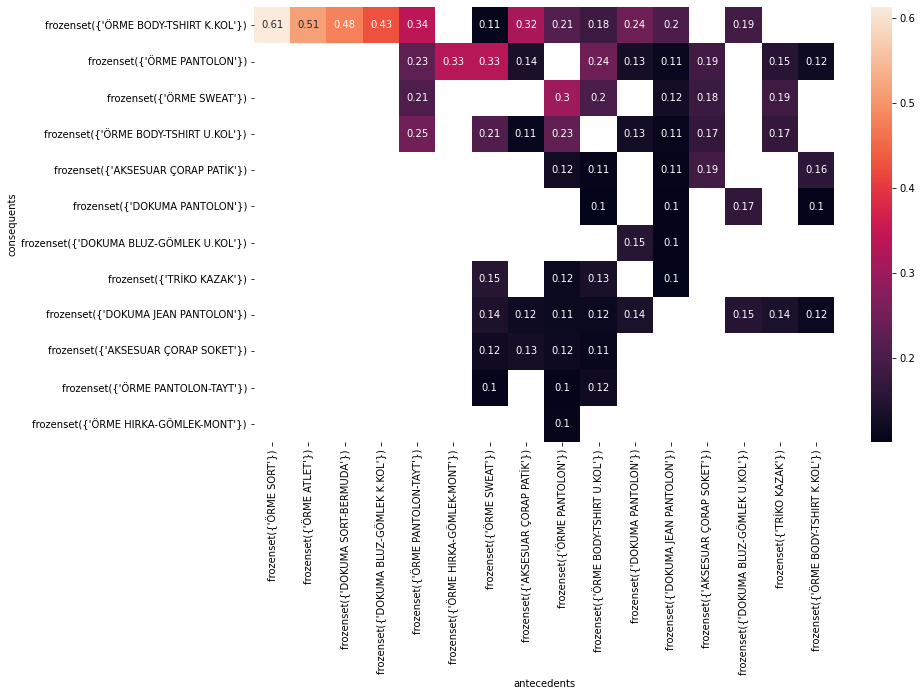

In [21]:
support_table = model7.pivot(index='consequents', columns='antecedents', values='confidence')

plt.figure(figsize=(13,8))
sns.heatmap(support_table, annot=True, cbar=True)
plt.show() 

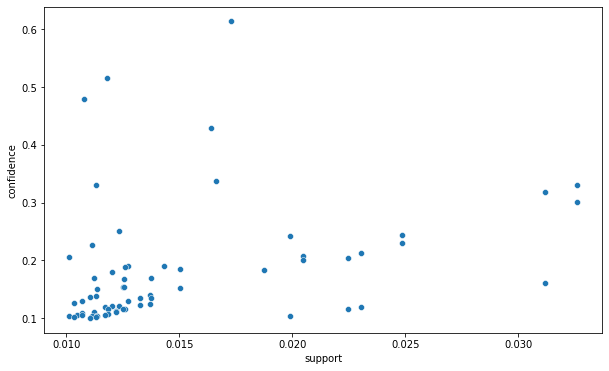

In [22]:
# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", data = model7)
plt.show()

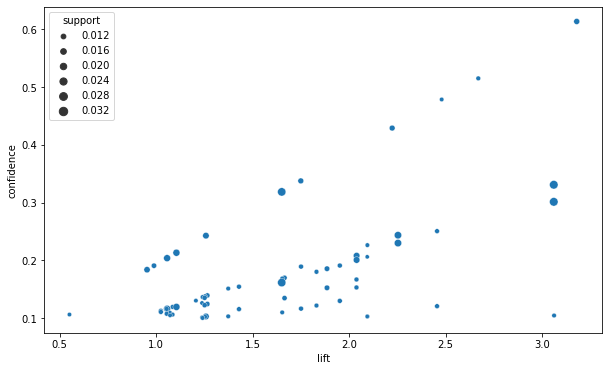

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "lift", y = "confidence", 
                size = "support", data = model7)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_16228\44479016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model7_rtc["confidence"]=round(model7_rtc["confidence"]*100,2)


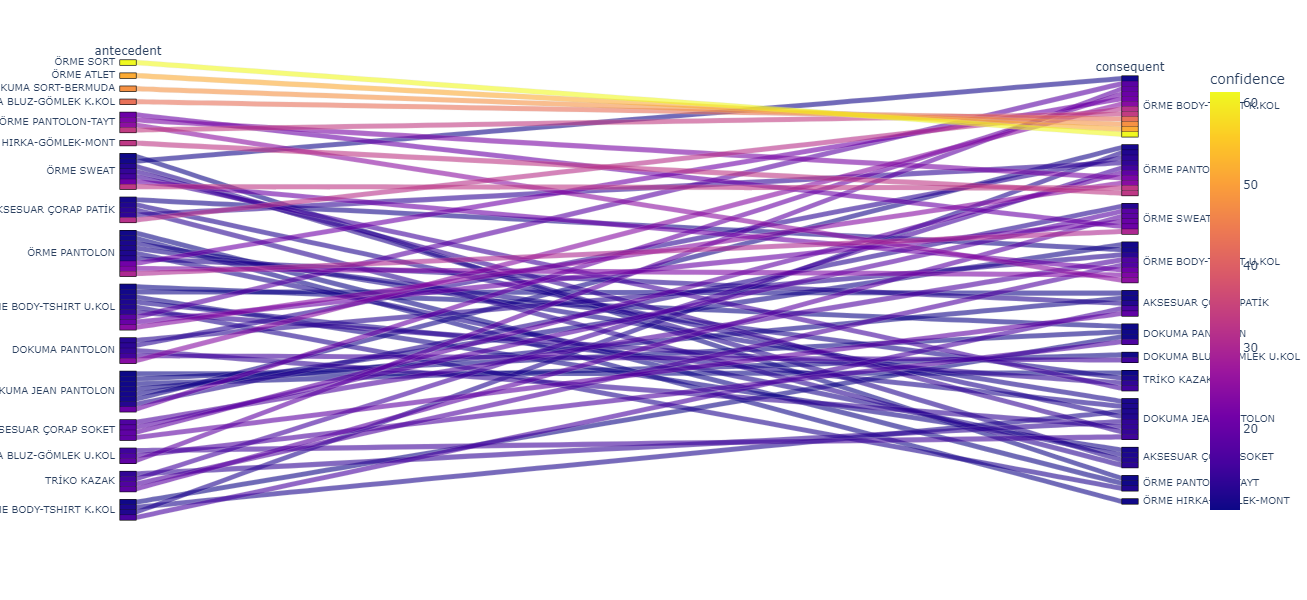

In [18]:
model7_rtc = rules_to_coordinates(model7)
model7_rtc["confidence"]=round(model7_rtc["confidence"]*100,2)

fig = px.parallel_categories(model7_rtc,color="confidence",height=600)
fig.show()


#### Yaz mevsimi bazında modellemesi

##### Modelleme

In [96]:
model8=modelleme(df,mevsim="yaz",column="KlasmanGrupTanim",min_support=0.01,min_threshold=0.1)

##### Model sonuçları

In [97]:
model8

antecedents                 consequents  \
0                  (ÖRME SORT)    (ÖRME BODY-TSHIRT K.KOL)   
1         (ÖRME PANTOLON-TAYT)    (ÖRME BODY-TSHIRT K.KOL)   
2                 (ÖRME ATLET)    (ÖRME BODY-TSHIRT K.KOL)   
3        (DOKUMA SORT-BERMUDA)    (ÖRME BODY-TSHIRT K.KOL)   
4   (DOKUMA JEAN SORT-BERMUDA)    (ÖRME BODY-TSHIRT K.KOL)   
5   (DOKUMA BLUZ-GÖMLEK K.KOL)    (ÖRME BODY-TSHIRT K.KOL)   
6              (ÖRME PANTOLON)    (ÖRME BODY-TSHIRT K.KOL)   
7       (AKSESUAR ÇORAP PATİK)    (ÖRME BODY-TSHIRT K.KOL)   
8          (ÖRME ELBİSE K.KOL)    (ÖRME BODY-TSHIRT K.KOL)   
9                 (ÖRME SWEAT)             (ÖRME PANTOLON)   
10    (ÖRME BODY-TSHIRT U.KOL)    (ÖRME BODY-TSHIRT K.KOL)   
11           (DOKUMA PANTOLON)    (ÖRME BODY-TSHIRT K.KOL)   
12      (DOKUMA JEAN PANTOLON)    (ÖRME BODY-TSHIRT K.KOL)   
13            (AKSESUAR DİĞER)    (ÖRME BODY-TSHIRT K.KOL)   
14      (AKSESUAR ÇORAP SOKET)      (AKSESUAR ÇORAP PATİK)   
15      (AKSESUAR ÇORAP SOKET)    (ÖRME BODY-TSHIRT K.KOL)   
16                  (AYAKKABI)    (ÖRME BODY-TSHIRT K.KOL)   
17  (DOKUMA BLUZ-GÖMLEK U.KOL)    (ÖRME BODY-TSHIRT K.KOL)   
18           (SANDALET-TERLİK)    (ÖRME BODY-TSHIRT K.KOL)   
19       (DOKUMA ELBİSE K.KOL)    (ÖRME BODY-TSHIRT K.KOL)   
20            (AKSESUAR ÇANTA)    (ÖRME BODY-TSHIRT K.KOL)   
21                (ÖRME ATLET)                 (ÖRME SORT)   
22                 (ÖRME SORT)                (ÖRME ATLET)   
23                 (ÖRME SORT)      (AKSESUAR ÇORAP PATİK)   
24       (DOKUMA SORT-BERMUDA)  (DOKUMA BLUZ-GÖMLEK K.KOL)   
25    (ÖRME BODY-TSHIRT U.KOL)             (ÖRME PANTOLON)   
26             (ÖRME PANTOLON)    (ÖRME BODY-TSHIRT U.KOL)   
27                (ÖRME ATLET)      (AKSESUAR ÇORAP PATİK)   
28  (DOKUMA BLUZ-GÖMLEK U.KOL)           (DOKUMA PANTOLON)   
29             (ÖRME PANTOLON)      (AKSESUAR ÇORAP PATİK)   
30       (DOKUMA SORT-BERMUDA)      (AKSESUAR ÇORAP PATİK)   
31             (ÖRME PANTOLON)                (ÖRME SWEAT)   
32  (DOKUMA BLUZ-GÖMLEK K.KOL)      (AKSESUAR ÇORAP PATİK)   
33    (ÖRME BODY-TSHIRT K.KOL)      (AKSESUAR ÇORAP PATİK)   
34  (DOKUMA BLUZ-GÖMLEK K.KOL)           (DOKUMA PANTOLON)   
35           (DOKUMA PANTOLON)      (AKSESUAR ÇORAP PATİK)   
36  (DOKUMA BLUZ-GÖMLEK K.KOL)       (DOKUMA SORT-BERMUDA)   
37      (DOKUMA JEAN PANTOLON)      (AKSESUAR ÇORAP PATİK)   
38           (DOKUMA PANTOLON)  (DOKUMA BLUZ-GÖMLEK K.KOL)   
39           (DOKUMA PANTOLON)      (DOKUMA JEAN PANTOLON)   
40           (DOKUMA PANTOLON)  (DOKUMA BLUZ-GÖMLEK U.KOL)   
41      (DOKUMA JEAN PANTOLON)           (DOKUMA PANTOLON)   
42    (ÖRME BODY-TSHIRT K.KOL)                 (ÖRME SORT)   
43    (ÖRME BODY-TSHIRT K.KOL)  (DOKUMA BLUZ-GÖMLEK K.KOL)   
44      (AKSESUAR ÇORAP PATİK)  (DOKUMA BLUZ-GÖMLEK K.KOL)   
45      (AKSESUAR ÇORAP PATİK)      (DOKUMA JEAN PANTOLON)   
46    (ÖRME BODY-TSHIRT K.KOL)      (DOKUMA JEAN PANTOLON)   
47      (AKSESUAR ÇORAP PATİK)                 (ÖRME SORT)   
48    (ÖRME BODY-TSHIRT K.KOL)           (DOKUMA PANTOLON)   
49      (AKSESUAR ÇORAP PATİK)           (DOKUMA PANTOLON)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.065055            0.321127  0.036077    0.554554  1.726898   
1             0.043197            0.321127  0.022746    0.526568  1.639748   
2             0.059566            0.321127  0.028694    0.481718  1.500083   
3             0.061068            0.321127  0.027884    0.456607  1.421889   
4             0.027945            0.321127  0.012660    0.453038  1.410773   
5             0.085255            0.321127  0.034681    0.406786  1.266745   
6             0.065670            0.321127  0.026063    0.396887  1.235920   
7             0.132970            0.321127  0.051887    0.390214  1.215139   
8             0.038082            0.321127  0.014492    0.380554  1.185058   
9             0.029532            0.065670  0.011119    0.376513  5.733440  

##### Heatmap 

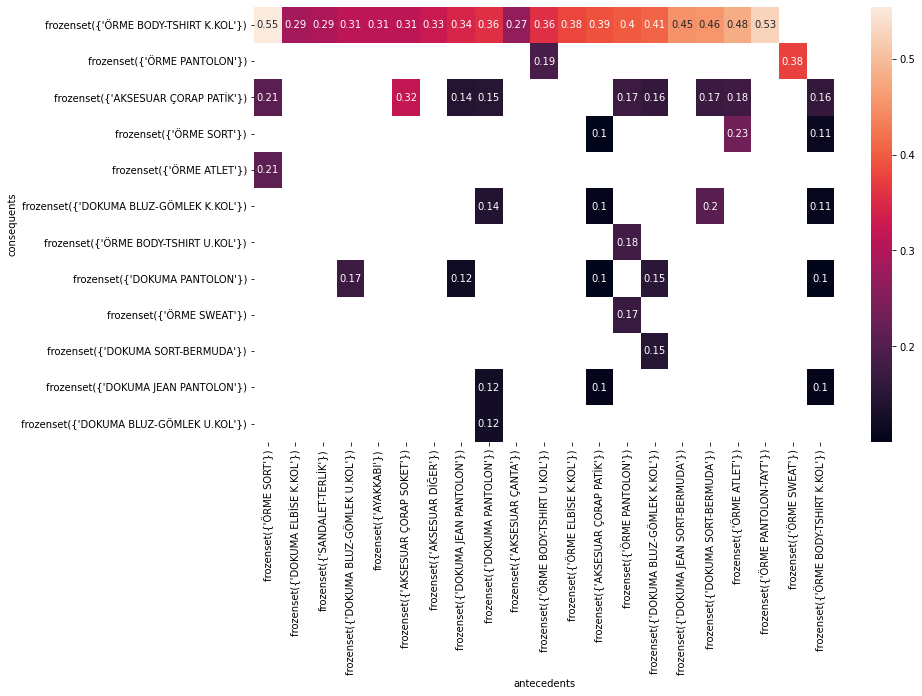

In [98]:
support_table = model8.pivot(index='consequents', columns='antecedents', values='confidence')

plt.figure(figsize=(13,8))
sns.heatmap(support_table, annot=True, cbar=True)
plt.show() 

##### Scatterplot 

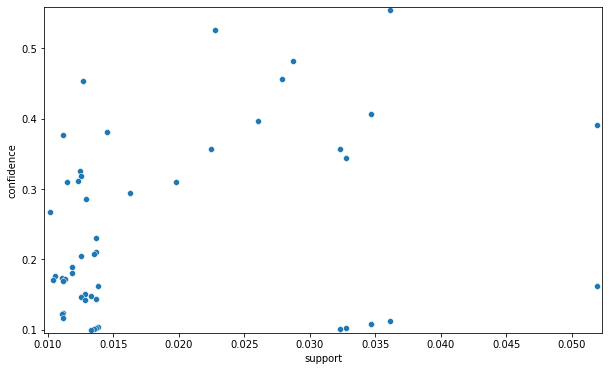

In [99]:
# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", data = model8)
plt.margins(0.01,0.01)
plt.show()

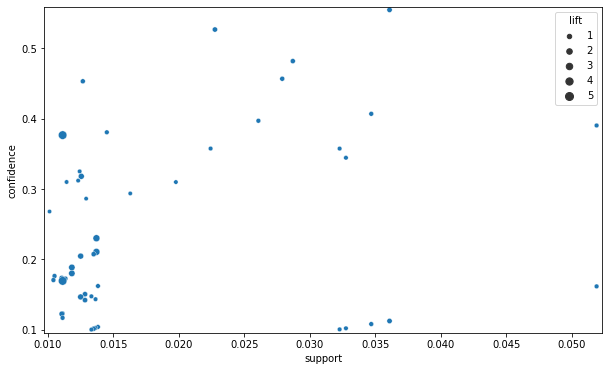

In [100]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = model8)
plt.margins(0.01,0.01)
plt.show()

#####  Parallel coordinates

In [101]:
model8_rtc = rules_to_coordinates(model8)
model8_rtc

antecedent                consequent  confidence
0                  ÖRME SORT    ÖRME BODY-TSHIRT K.KOL    0.554554
1         ÖRME PANTOLON-TAYT    ÖRME BODY-TSHIRT K.KOL    0.526568
2                 ÖRME ATLET    ÖRME BODY-TSHIRT K.KOL    0.481718
3        DOKUMA SORT-BERMUDA    ÖRME BODY-TSHIRT K.KOL    0.456607
4   DOKUMA JEAN SORT-BERMUDA    ÖRME BODY-TSHIRT K.KOL    0.453038
5   DOKUMA BLUZ-GÖMLEK K.KOL    ÖRME BODY-TSHIRT K.KOL    0.406786
6              ÖRME PANTOLON    ÖRME BODY-TSHIRT K.KOL    0.396887
7       AKSESUAR ÇORAP PATİK    ÖRME BODY-TSHIRT K.KOL    0.390214
8          ÖRME ELBİSE K.KOL    ÖRME BODY-TSHIRT K.KOL    0.380554
9                 ÖRME SWEAT             ÖRME PANTOLON    0.376513
10    ÖRME BODY-TSHIRT U.KOL    ÖRME BODY-TSHIRT K.KOL    0.357404
11           DOKUMA PANTOLON    ÖRME BODY-TSHIRT K.KOL    0.357350
12      DOKUMA JEAN PANTOLON    ÖRME BODY-TSHIRT K.KOL    0.344354
13            AKSESUAR DİĞER    ÖRME BODY-TSHIRT K.KOL    0.325004
14      AKSESUAR ÇORAP SOKET      AKSESUAR ÇORAP PATİK    0.317950
15      AKSESUAR ÇORAP SOKET    ÖRME BODY-TSHIRT K.KOL    0.311863
16                  AYAKKABI    ÖRME BODY-TSHIRT K.KOL    0.309895
17  DOKUMA BLUZ-GÖMLEK U.KOL    ÖRME BODY-TSHIRT K.KOL    0.309786
18           SANDALET-TERLİK    ÖRME BODY-TSHIRT K.KOL    0.293614
19       DOKUMA ELBİSE K.KOL    ÖRME BODY-TSHIRT K.KOL    0.286245
20            AKSESUAR ÇANTA    ÖRME BODY-TSHIRT K.KOL    0.267928
21                ÖRME ATLET                 ÖRME SORT    0.229983
22                 ÖRME SORT                ÖRME ATLET    0.210576
23                 ÖRME SORT      AKSESUAR ÇORAP PATİK    0.207314
24       DOKUMA SORT-BERMUDA  DOKUMA BLUZ-GÖMLEK K.KOL    0.204572
25    ÖRME BODY-TSHIRT U.KOL             ÖRME PANTOLON    0.188496
26             ÖRME PANTOLON    ÖRME BODY-TSHIRT U.KOL    0.180032
27                ÖRME ATLET      AKSESUAR ÇORAP PATİK    0.176261
28  DOKUMA BLUZ-GÖMLEK U.KOL           DOKUMA PANTOLON    0.173232
29             ÖRME PANTOLON      AKSESUAR ÇORAP PATİK    0.172634
30       DOKUMA SORT-BERMUDA      AKSESUAR ÇORAP PATİK    0.170553
31             ÖRME PANTOLON                ÖRME SWEAT    0.169317
32  DOKUMA BLUZ-GÖMLEK K.KOL      AKSESUAR ÇORAP PATİK    0.162059
33    ÖRME BODY-TSHIRT K.KOL      AKSESUAR ÇORAP PATİK    0.161577
34  DOKUMA BLUZ-GÖMLEK K.KOL           DOKUMA PANTOLON    0.150465
35           DOKUMA PANTOLON      AKSESUAR ÇORAP PATİK    0.147443
36  DOKUMA BLUZ-GÖMLEK K.KOL       DOKUMA SORT-BERMUDA    0.146535
37      DOKUMA JEAN PANTOLON      AKSESUAR ÇORAP PATİK    0.143344
38           DOKUMA PANTOLON  DOKUMA BLUZ-GÖMLEK K.KOL    0.142062
39           DOKUMA PANTOLON      DOKUMA JEAN PANTOLON    0.123075
40           DOKUMA PANTOLON  DOKUMA BLUZ-GÖMLEK U.KOL    0.122395
41      DOKUMA JEAN PANTOLON           DOKUMA PANTOLON    0.116859
42    ÖRME BODY-TSHIRT K.KOL                 ÖRME SORT    0.112344
43    ÖRME BODY-TSHIRT K.KOL  DOKUMA BLUZ-GÖMLEK K.KOL    0.107996
44      AKSESUAR ÇORAP PATİK  DOKUMA BLUZ-GÖMLEK K.KOL    0.103906
45      AKSESUAR ÇORAP PATİK      DOKUMA JEAN PANTOLON    0.102520
46    ÖRME BODY-TSHIRT K.KOL      DOKUMA JEAN PANTOLON    0.101979
47      AKSESUAR ÇORAP PATİK                 ÖRME SORT    0.101428
48    ÖRME BODY-TSHIRT K.KOL           DOKUMA PANTOLON    0.100483
49      AKSESUAR ÇORAP PATİK           DOKUMA PANTOLON    0.100126

In [102]:
model8_rtc["confidence"]=round(model8_rtc["confidence"]*100,2)

C:\Users\PC\AppData\Local\Temp\ipykernel_7208\6491764.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



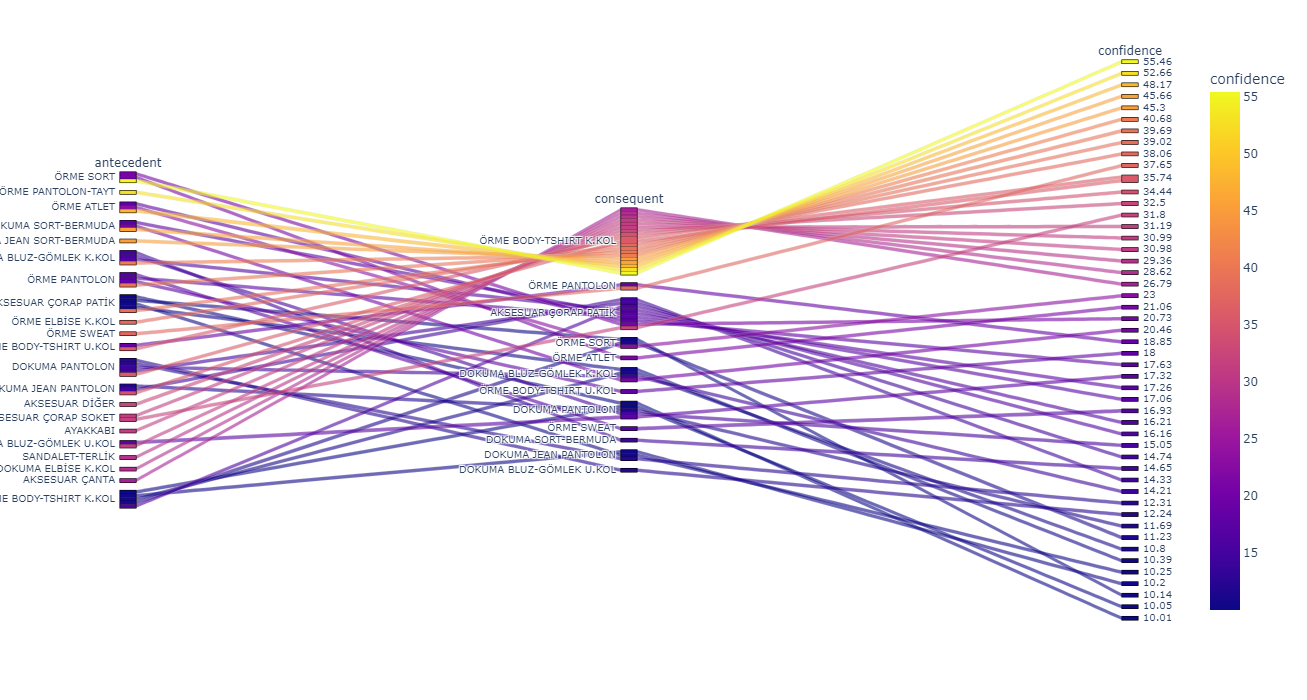

In [103]:
fig = px.parallel_categories(model8_rtc,color="confidence",height=700)

fig.show()


#### Kış mevsimi bazında genel modellemesi

##### Modelleme

In [104]:
model9=modelleme(df,mevsim="kış",column="KlasmanGrupTanim",min_support=0.01,min_threshold=0.1)

##### Model sonuçları

In [105]:
model9

antecedents                 consequents  \
0      (ÖRME SWEAT, ÖRME BODY-TSHIRT U.KOL)             (ÖRME PANTOLON)   
1   (ÖRME BODY-TSHIRT U.KOL, ÖRME PANTOLON)                (ÖRME SWEAT)   
2                           (ÖRME PANTOLON)                (ÖRME SWEAT)   
3                              (ÖRME SWEAT)             (ÖRME PANTOLON)   
4                      (ÖRME PANTOLON-TAYT)    (ÖRME BODY-TSHIRT U.KOL)   
..                                      ...                         ...   
58                          (ÖRME PANTOLON)      (DOKUMA JEAN PANTOLON)   
59                 (ÖRME BODY-TSHIRT U.KOL)    (ÖRME BODY-TSHIRT K.KOL)   
60                            (TRİKO KAZAK)  (DOKUMA BLUZ-GÖMLEK U.KOL)   
61                          (ÖRME PANTOLON)    (ÖRME BODY-TSHIRT K.KOL)   
62                             (ÖRME SWEAT)        (ÖRME PANTOLON-TAYT)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.028518            0.126232  0.013355    0.468308  3.709910   
1             0.031069            0.147071  0.013355    0.429863  2.922827   
2             0.126232            0.147071  0.047586    0.376974  2.563211   
3             0.147071            0.126232  0.047586    0.323558  2.563211   
4             0.046576            0.125561  0.014986    0.321759  2.562564   
..                 ...                 ...       ...         ...       ...   
58            0.126232            0.111558  0.013319    0.105512  0.945808   
59            0.125561            0.067306  0.013115    0.104452  1.551894   
60            0.134219            0.083289  0.013908    0.103622  1.244120   
61            0.126232            0.067306  0.013074    0.103575  1.538852   
62            0.147071            0.046576  0.014819    0.100758  2.163308   

    leverage  conviction  
0   0.009755    1.643374  
1   0.008786    1.496007  
2   0.029021    1.369010  
3   0.029021    1.291713  
4   0.009138    1.289274  
..       ...         ...  
58 -0.000763    0.993241  
59  0.004664    1.041478  
60  0.002729    1.022683  
61  0.004578    1.040459  
62  0.007969    1.060253  

[63 rows x 9 columns]

##### Heatmap 

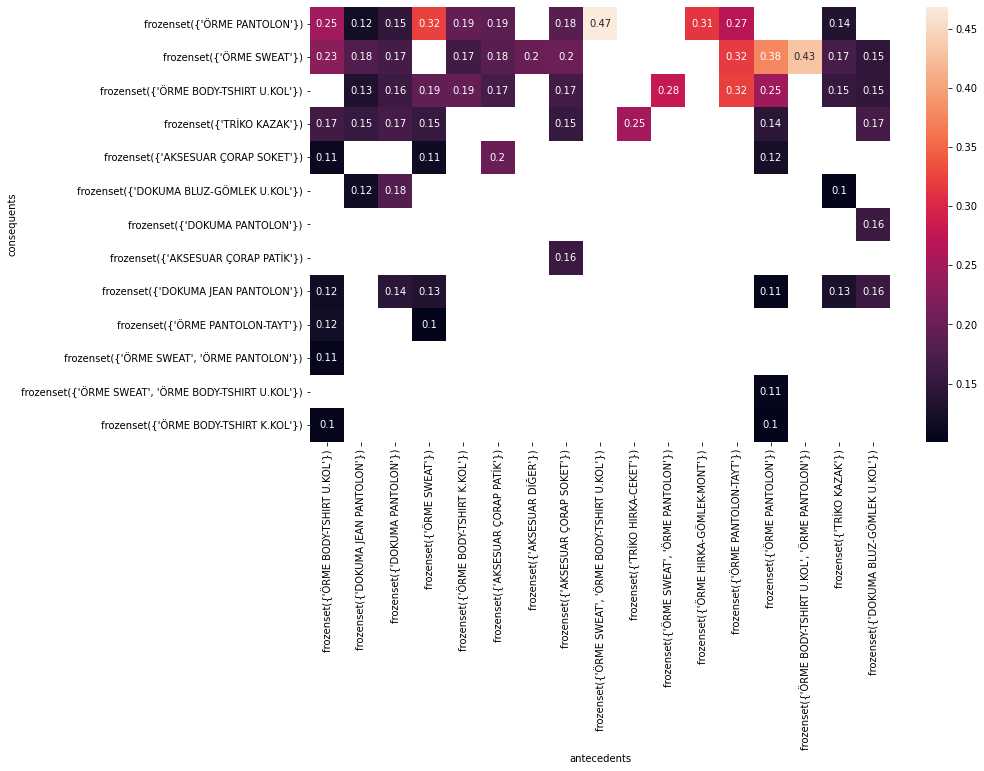

In [106]:
support_table = model9.pivot(index='consequents', columns='antecedents', values='confidence')

plt.figure(figsize=(13,8))
sns.heatmap(support_table, annot=True, cbar=True)
plt.show() 

##### Scatterplot 

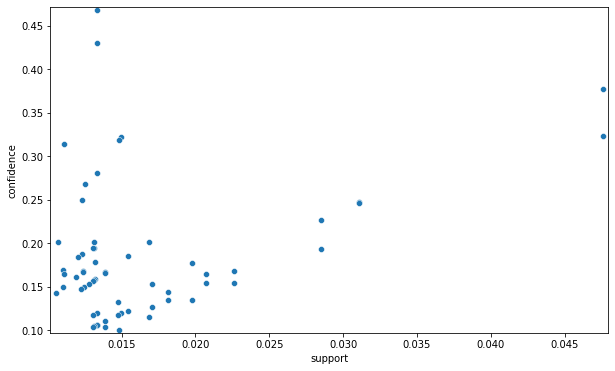

In [107]:
# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", data = model9)
plt.margins(0.01,0.01)
plt.show()

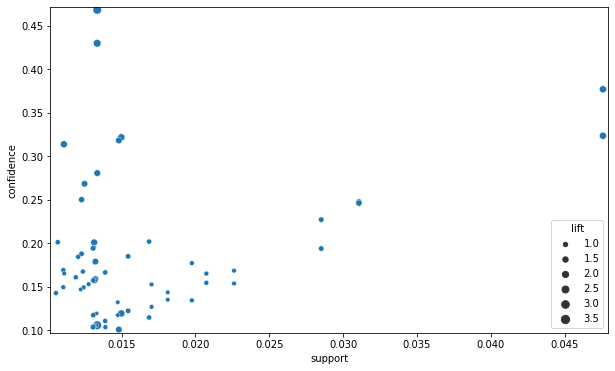

In [108]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = model9)
plt.margins(0.01,0.01)
plt.show()

#####  Parallel coordinates

C:\Users\PC\AppData\Local\Temp\ipykernel_7208\980484290.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



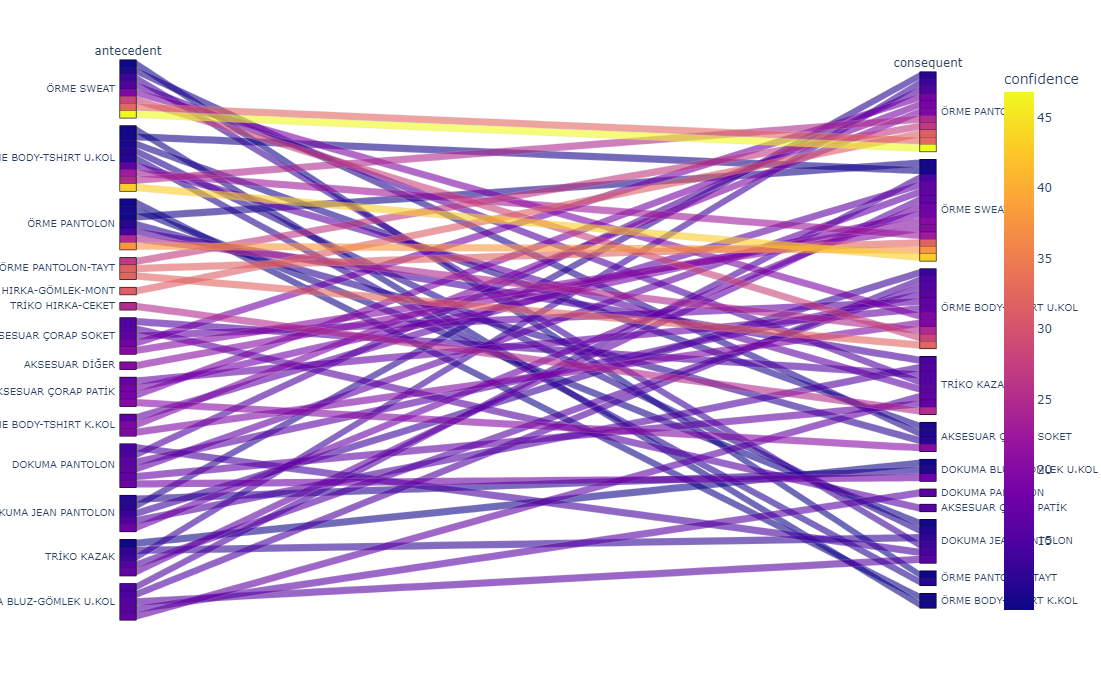

In [109]:
model9_rtc = rules_to_coordinates(model9)
model9_rtc["confidence"]=round(model9_rtc["confidence"]*100,2)

fig = px.parallel_categories(model9_rtc,color="confidence",height=700)
fig.show()